In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

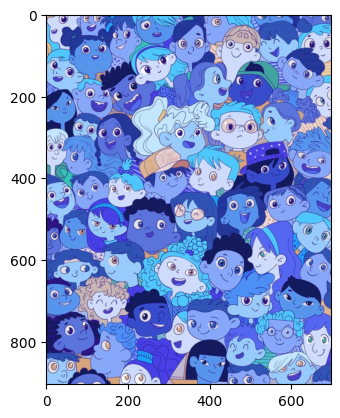

In [15]:
image = cv2.imread("Finding/cut_1.jpg")
plt.imshow(image)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
object_list = os.listdir("match_template/Finding/1")
object_list = [os.path.join("match_template/Finding/1", obj) for obj in object_list]
object_list

['match_template/Finding/1\\ballon.png',
 'match_template/Finding/1\\boat.png',
 'match_template/Finding/1\\cake.png',
 'match_template/Finding/1\\car.png',
 'match_template/Finding/1\\duck.png',
 'match_template/Finding/1\\grapes.png',
 'match_template/Finding/1\\ice_cream.jpg',
 'match_template/Finding/1\\pony.png',
 'match_template/Finding/1\\rabbit.png',
 'match_template/Finding/1\\strawberry.png',
 'match_template/Finding/1\\teddy_bear.png',
 'match_template/Finding/1\\tennis_ball.png',
 'match_template/Finding/1\\tie.png',
 'match_template/Finding/1\\train.png',
 'match_template/Finding/1\\watermelon.png']

In [18]:
output_image = image.copy()

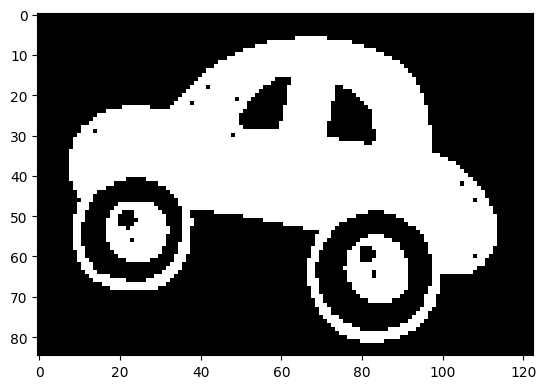

In [23]:
# mask background
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)
    return mask

mask = create_mask(cv2.imread(object_list[3]))
plt.imshow(mask, cmap="gray")

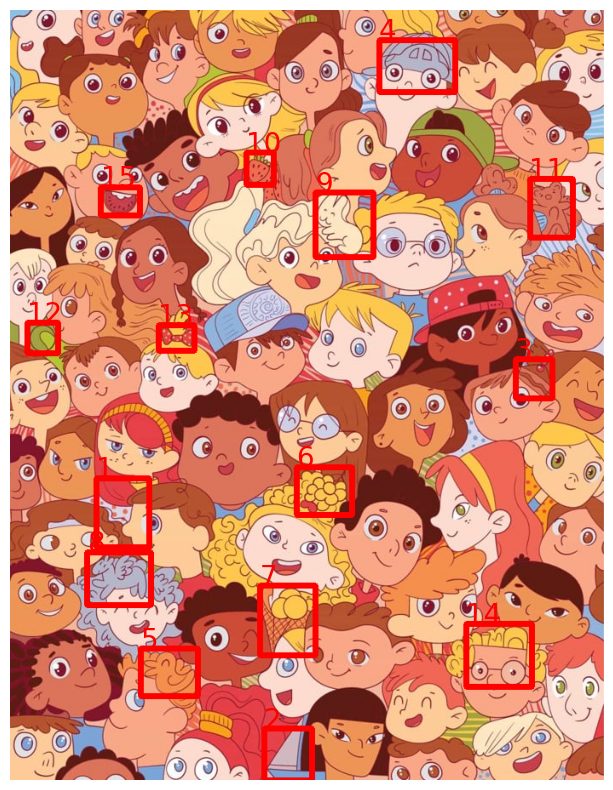

In [26]:
# Scale the size of template (from 50% -> 100%, step = 10)
scales = np.linspace(0.5, 1, 10)
res_points = [] 
for object_path in object_list:
    template = cv2.imread(object_path)


    mask = create_mask(template)

    # Init score to find max_val of each template
    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv2.resize(mask, (resized_template.shape[1], resized_template.shape[0]))

        w, h = resized_template.shape[1], resized_template.shape[0]

        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED, mask=resized_mask)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(output_image, top_left, bottom_right, (0, 0,255), 5)
        res_points.append(top_left)
plt.figure(figsize=(10, 10))
for idx in range(len(res_points)):
    plt.annotate(str(idx+1), res_points[idx], color="red", fontsize=20)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()